<a href="https://colab.research.google.com/github/vitalouivi/ML/blob/main/ML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение. Лабораторная работа №1.

Выполнил: Овечкин Виталий Андреевич

Группа: М8О-308Б-18.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import files

In [4]:
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5\r\n7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5\r\n11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5\r\n7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5\r\n7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7\r\n7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5\r\n7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5\r\n8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,5\r\n8.9,0.62,0.1

In [48]:
!ls

sample_data  winequality-red.csv


In [49]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Описание признаков
**Входные данные**

1.   fixed acidity (фиксированная кислотность) - вещественный признак.
2.   volatile acidity (летучая кислотность) - вещественный признак.
3.   citric acid (лимонная кислота) - вещественный признак.
4.   residual sugar (остаточный сахар) - вещественный признак.
5.   chlorides (хлориды) - вещественный признак.
6.   free sulfur dioxide (свободный диоксид серы) - вещественный признак.
7.   total sulfur dioxide (общий диоксид серы) - вещественный признак.
8.   density (плотность) - вещественный признак.
9.   pH (водородный показатель) - вещественный признак.
10.  sulphates (сульфаты) - вещественный признак.
11.   alcohol (алкоголь) - вещественный признак.

### Выходные данные
Quality (качество вина) - от 1 до 10.

### Постановка задачи
Исходя из данных о вине, сказать о его качестве.

###Анализ датасета
Датасет не содержит пропусков.

In [50]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Сильной корреляции между признаками нет.

In [51]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe76f4c1190>,
      dtype=object)

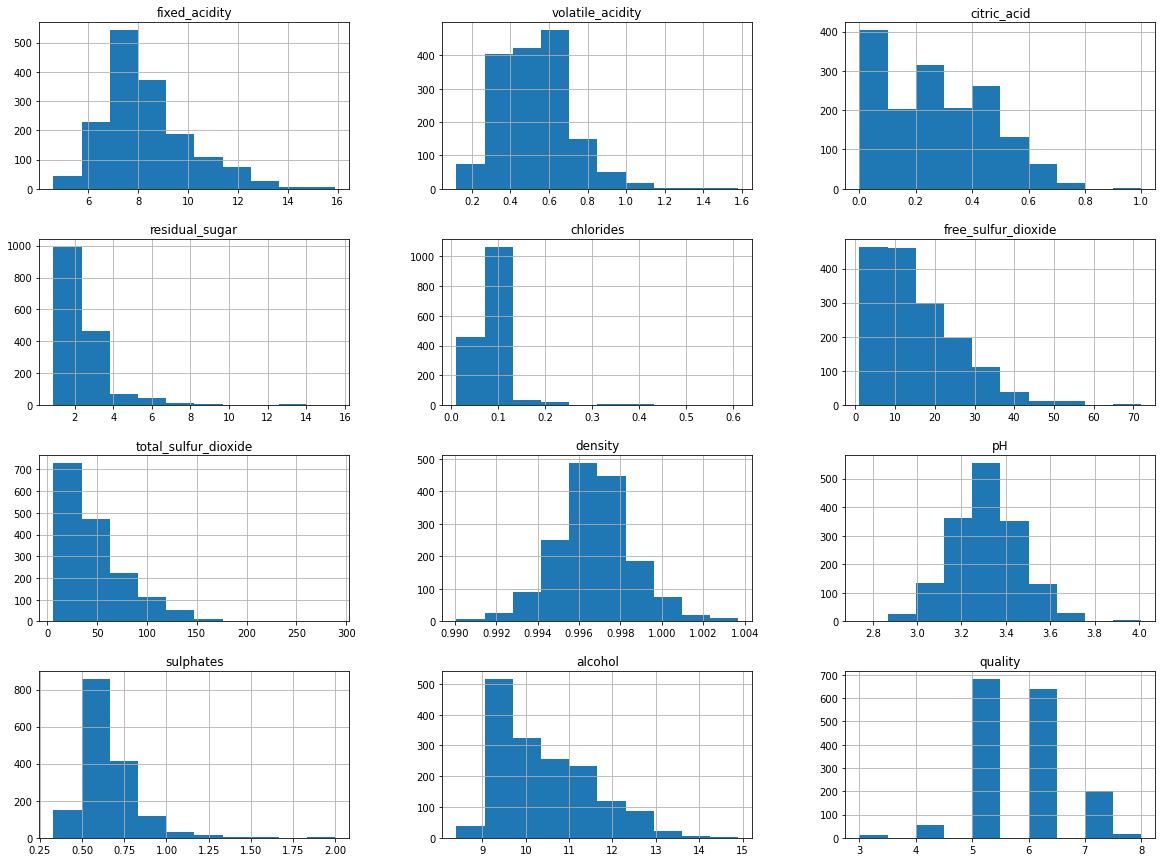

In [52]:
data.hist(figsize=(20, 15))

## Алгоритм KNN
### Подготовка датасета¶
Отнормируем значения признаков.

In [53]:
design_matrix, target = data.drop(columns=['quality']).to_numpy(), np.array(data['quality'])

In [54]:
design_matrix

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [55]:
target

array([5, 5, 5, ..., 6, 5, 6])

In [57]:
cnt_signs = design_matrix.shape[1]
max_values = np.zeros(cnt_signs)
for i in range(cnt_signs):
    max_in_clmn = design_matrix[:, i].max()
    max_values[i] = max_in_clmn
    design_matrix[:, i] /= max_in_clmn

Первый класс выходных данных - тип стекла более 5.

Второй класс выходных данных - тип стекла не более 5.

In [58]:
print(data[data['quality'] > 5].shape[0] / data['quality'].shape[0] * 100)
print(data[data['quality'] <= 5].shape[0] / data['quality'].shape[0] * 100)

53.47091932457786
46.52908067542214


In [59]:
for index in range(len(target)):
    if target[index] > 5:
        target[index] = 1
    else:
        target[index] = 0

In [60]:
target

array([0, 0, 0, ..., 1, 0, 1])

In [61]:
def euclidean(vec1, vec2):
    return sum([(x - y) ** 2 for x, y in zip(vec1, vec2)]) ** 0.5

### Разбиение на обучающую и тестовую выборки.

In [62]:
features_train, features_test, target_train, target_test = train_test_split(design_matrix, target, test_size=0.2, random_state=24)

In [64]:
class KNN:
    
    def __init__(self, design_matrix, target):
        self.design_matrix = design_matrix
        self.target = target
        
    
    def predict(self, obj_array, k, metric):
        neighbours = np.zeros((self.design_matrix.shape[0], 2))
        for idx in range(self.design_matrix.shape[0]):
            neighbours[idx] = (metric(obj_array, self.design_matrix[idx]), self.target[idx])
        sorted_k_neighbours = sorted(neighbours, key=lambda x: x[0])[:k]
        cnt_0, cnt_1 = 0, 0
        for _, target in sorted_k_neighbours:
            if target == 1:
                cnt_1 += 1
            else:
                cnt_0 += 1
        
        return 1 if cnt_1 > cnt_0 else 0
    
    
    def score(self, features, target, k, metric):
        right_predict_number = 0
        for idx in range(features.shape[0]):
            if self.predict(features[idx], k, metric) == target[idx]:
                right_predict_number += 1
        return right_predict_number / target.shape[0]

### Проверка точности

In [65]:
knn_obj = KNN(features_train, target_train)
print('Результат собственной реализации KNN на обучающей выборке: ', knn_obj.score(features_train, target_train, 3, euclidean))
print('Результат собственной реализации KNN на тестовой выборке: ', knn_obj.score(features_test, target_test, 3, euclidean))

Результат собственной реализации KNN на обучающей выборке:  0.8663017982799062
Результат собственной реализации KNN на тестовой выборке:  0.71875


In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train, target_train)
print('Результат sklearn реализации KNN на обучающей выборке: {}'.format(knn.score(features_train, target_train)))
print('Результат sklearn реализации KNN на тестовой выборке: {}'.format(knn.score(features_test, target_test)))

Результат sklearn реализации KNN на обучающей выборке: 0.8663017982799062
Результат sklearn реализации KNN на тестовой выборке: 0.71875


## Наивный байесовский классификатор
Поскольку признаки являются непрерывными величинами, то будем использовать нормальное распределение.

In [67]:
class NormalDistribution:
    
    def __init__(self, mean, std):
        self.mean = mean
        # standart deviation
        self.std = std
    
    
    def probability_density(self, value):
        return 1 / (self.std * (2 * np.pi) ** 0.5 * np.exp((value - self.mean) ** 2 / (2 * self.std ** 2)))

In [68]:
class NaiveBayes:
    
    def fit(self, X, Y):
        self.label_probabilities = {
            0: len(Y[Y == 0]) / len(Y),
            1: len(Y[Y == 1]) / len(Y)
        }
        self.conditional_probabilities = {}
        for value in (0, 1):
            probabilities = []
            for column in range(X.shape[1]):
                x = X[Y == value, column]
                probabilities.append(NormalDistribution(x.mean(axis=0), x.std(axis=0)))
            self.conditional_probabilities[value] = probabilities
            
    
    def predict(self, feature):
        label_probabilities = {}
        for value in (0, 1):
            conditional_feature_probability = 0
            for i in range(feature.shape[0]): 
              conditional_feature_probability += np.log(self.conditional_probabilities[value][i].probability_density(feature[i]))
              label_probabilities[value] = np.log(self.label_probabilities[value]) + conditional_feature_probability
        return 1 if label_probabilities[1] > label_probabilities[0] else 0


    def score(self, features, target):
        rigth_predict_number = 0
        for i in range(features.shape[0]):
            if self.predict(features[i]) == target[i]:
                rigth_predict_number += 1

        return rigth_predict_number / target.shape[0]

In [69]:
design_matrix, target = data.drop(columns=['quality']).to_numpy(), np.array(data['quality'])

In [70]:
for index in range(len(target)):
    if target[index] > 5:
        target[index] = 1
    else:
        target[index] = 0

In [71]:
target

array([0, 0, 0, ..., 1, 0, 1])

In [72]:
features_train, features_test, target_train, target_test = train_test_split(design_matrix, target, test_size=0.2, random_state=24)

In [73]:
nb = NaiveBayes()
nb.fit(features_train, target_train)
print('Результат собственной реализации наивного байесовского классификатора на обучающей выборке: ', nb.score(features_train, target_train))
print('Результат собственной реализации наивного байесовского классификатора на тестовой выборке: ', nb.score(features_test, target_test))

Результат собственной реализации наивного байесовского классификатора на обучающей выборке:  0.7404222048475372
Результат собственной реализации наивного байесовского классификатора на тестовой выборке:  0.70625


In [74]:
sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(features_train, target_train)
print('Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: {}'.format(sklearn_nb.score(features_train, target_train)))
print('Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: {}'.format(sklearn_nb.score(features_test, target_test)))

Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: 0.7372947615324472
Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: 0.7125
